# Linear classifier

### Name : Eun-Yeong Jeon 

# Linear class in model.py

SGD를 사용하는 Linear classifier와 Random Search를 사용하는 Linear classifier의 상위 클래스

shape notation
- bn : batch 개수
- bs : batch size
- c : channel 개수
- w : img 가로
- h : img 세로


### Attributes

- result path : 결과 저장 위치
- weight path : weight 저장 위치
- in_features : 입력 dimension
- out_features : 출력 dimension
- with_grad : gradient를 사용해서 학습을 시키는지 여부
- reg : Regularization term의 hyperparameter
- W_t : Linear classifier의 weight 
    - W_t shape : [in_features,out_features]
- mode : gradient 쓸 지 결정하는 변수. mode에는 'train','valid','test'가 있다.
- gW_t : loss를 W_t로 미분(gradient)한 값 

### Methods

- init_weight() : weight 초기화
    - Linear classifer 비교하려고 각 Linear classifer 같은 초기화값 쓰도록 구현
- predict(X) : 각 label에 대해 예측한 확률 리턴
    - X shape : [bs, c*w*h]
- softmax(x) : x에 대한 softmax값 리턴
- reg_loss : regularization term의 loss를 구한다. 
    - regularization으로는 L2를 사용했다. 
    - gradient를 사용하고 train 모드라면 gradinet를 구한다
- cross_entropy_loss(softmax,Y_one_hot,X=None) : 모델의 예측값과 라벨에 대해 cross entropy loss를 구한다.
    - gradient를 사용하고 train 모드라면 gradient를 구한다.
- optimize(lr) : learning rate가 lr인 SGD를 사용하여 weight를 update한다.
    - weight를 update를 하면 gradient를 0으로 초기화 시킨다.
- evaluate(X,Y_one_hot,mode='train',x_train=None): 현재 모델로 입력된 X에 대해 loss와  acc를 구한다.
- save_result(file,text) : file에 text를 이어서 저장
    - file 없으면 생성
- save(file) : 현재의 weight를 file에 저장
- load(file) : 저장된 weight를 불러온다.




# LinearSGD class in LinearSGD.py

SGD를 사용하는 Linear classifier. model.py의 Linear class를 상속받는다.

### Attributes
- Linear class의 attributes
- lr : gradient descent의 learning rate
- name : 저장 시 사용될 이름 

### Methods

- Linear class의 methods

- train(num_epochs,train_images,train_labels,val_images,val_labels) : 주어진 train data로 num_epochs만큼 학습시키고 각 epoch마다 val data로 평가하고 결과 저장
    - train_image,val_image shape : [bn,bs,c,w,h]
    - train_labels,val_labels shape : [bn,bs,1]
    - train loss,train acc,val loss, val acc를 리턴한다.


# LinearRS class in LinearRS.py

Random Search를 사용하는 Linear classifer

### Attributes
- Linear class의 attributes
- name : 결과 저장 시 사용되는 이름

### Methods
- Linear class의 methods
- train(num_epochs,train_images,train_labels,val_images,val_labels) : 주어진 train data로 num_epochs만큼 학습시키고 각 epoch마다 val data로 평가하고 결과 저장
    - train_image,val_image shape : [bn,bs,c,w,h]
    - train_labels,val_labels shape : [bn,bs,1]
    - train loss,train acc,val loss, val acc를 리턴한다.


# Data

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

### Data preprocessing
- pixel 값의 범위를 0~1로 조정 (utils.py의 convert_images(raw_images) 활용)

### Load data
- utils의 load_train_data(batch_size) 함수로 train data를 로드, load_test_data(batch_size) 함수로 test data를 로드
- images의 shape : [bn,bs,c,w,h] (bn:batch 개수, bs:batch 크기, c:채널 수, w,h: 이미지의 가로,세로)
- labels의 shape : [bn,bs,1]
 

In [1]:
import utils

batch_size=200

meta_file='batches.meta'

label_names=utils.get_label_names(meta_file)

train_images,train_labels=utils.load_train_data(batch_size)
test_images,test_labels=utils.load_test_data(batch_size)

# split train and validation data
val_images, val_labels = train_images[-1], train_labels[-1]

val_images = val_images.reshape(1, val_images.shape[0], val_images.shape[1], val_images.shape[2], -1)
val_labels = val_labels.reshape(1, val_labels.shape[0], -1)

train_images, train_labels = train_images[:-1], train_labels[:-1]


print(f'train image shape : {train_images.shape},train label shape : {train_labels.shape}')
print(f'val image shape : {val_images.shape},val label shape : {val_labels.shape}')
print(f'test image shape : {test_images.shape},test label shape : {test_labels.shape}')

train image shape : (249, 200, 3, 32, 32),train label shape : (249, 200, 1)
val image shape : (1, 200, 3, 32, 32),val label shape : (1, 200, 1)
test image shape : (50, 200, 3, 32, 32),test label shape : (50, 200, 1)


# Training LinearSGD & LinearRS

In [2]:
in_features=3072
out_features=10
lr=1e-2
num_epochs=20

In [3]:
from LinearSGD import LinearSGD
linear_sgd=LinearSGD(in_features,out_features,lr)
sgd_loss,sgd_acc,sgd_val_loss,sgd_val_acc=linear_sgd.train(num_epochs,train_images,train_labels,val_images,val_labels)

train 0, loss:0.2030651282582945, acc:0.2834738955823293

valid 0, loss:0.19582297817979302, acc:0.325

train 1, loss:0.18941190410556416, acc:0.3421285140562248

valid 1, loss:0.19134211773780227, acc:0.375

train 2, loss:0.18524263812161368, acc:0.3579116465863455

valid 2, loss:0.18909706950886085, acc:0.395

train 3, loss:0.18289566615846548, acc:0.36648594377510046

valid 3, loss:0.18758601442544, acc:0.41

train 4, loss:0.18130008199076436, acc:0.37230923694779106

valid 4, loss:0.18643590023273018, acc:0.41

train 5, loss:0.1801059010307884, acc:0.3770080321285139

valid 5, loss:0.18550573444860272, acc:0.41

train 6, loss:0.17915809426756452, acc:0.38062248995983944

valid 6, loss:0.18472608576050573, acc:0.405

train 7, loss:0.17837527019223542, acc:0.3830923694779117

valid 7, loss:0.18405668673217268, acc:0.41

train 8, loss:0.17770987967719187, acc:0.3859236947791168

valid 8, loss:0.18347170486259257, acc:0.415

train 9, loss:0.1771320135657881, acc:0.38853413654618474

va

In [4]:
from LinearRS import LinearRS

linear_rs=LinearRS(in_features,out_features)
rs_loss,rs_acc,rs_val_loss,rs_val_acc=linear_rs.train(num_epochs,train_images,train_labels,val_images,val_labels)

train 0, loss:0.23026027172703262, acc:0.10224899598393572

valid 0, loss:0.23025279829712522, acc:0.105

train 1, loss:0.23026230037190482, acc:0.10142570281124492

valid 1, loss:0.2303425493507318, acc:0.105

train 2, loss:0.2302603852621008, acc:0.09744979919678712

valid 2, loss:0.23022999724412044, acc:0.12

train 3, loss:0.2302705550666429, acc:0.0993975903614457

valid 3, loss:0.23033302221044824, acc:0.08

train 4, loss:0.2302584084459449, acc:0.09957831325301202

valid 4, loss:0.23028780305759075, acc:0.11

train 5, loss:0.23026112549047922, acc:0.1007228915662651

valid 5, loss:0.23011905871909266, acc:0.13

train 6, loss:0.23025688019971338, acc:0.1004819277108434

valid 6, loss:0.23019790825392916, acc:0.105

train 7, loss:0.23026504406929899, acc:0.10092369477911652

valid 7, loss:0.230262650456771, acc:0.105

train 8, loss:0.23025529229665007, acc:0.1

valid 8, loss:0.23027262984990152, acc:0.125

train 9, loss:0.23026258475409137, acc:0.09987951807228909

valid 9, loss:0

# Visualize result

SGD의 경우 train,val loss가 줄어드는 것을 확인할 수 있다

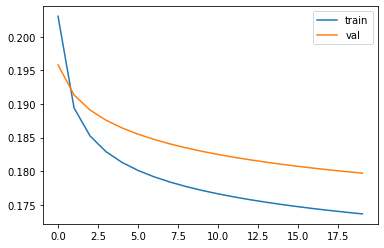

In [33]:
from visualize import *

plot_two(sgd_loss,'train',sgd_val_loss,'val')

Random Search의 경우 loss가 일정하게 줄어들지 않는다

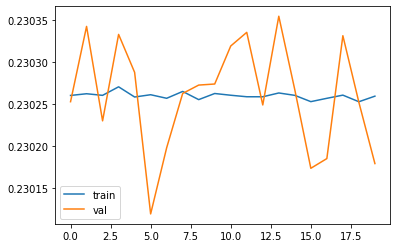

In [34]:
plot_two(rs_loss,'train',rs_val_loss,'val')

## Visualize weight

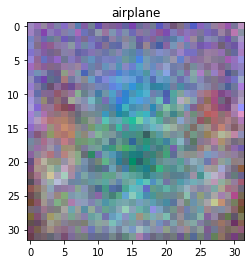

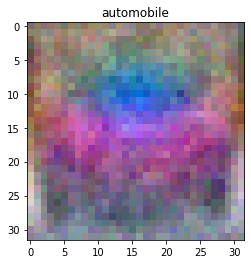

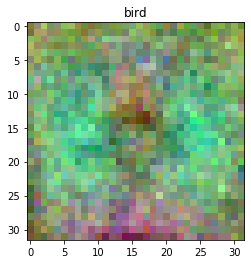

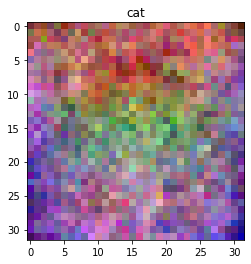

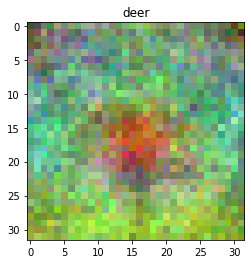

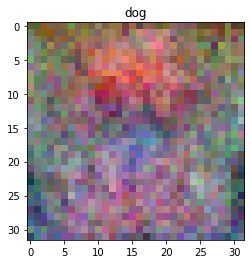

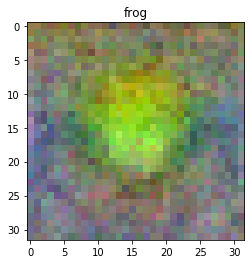

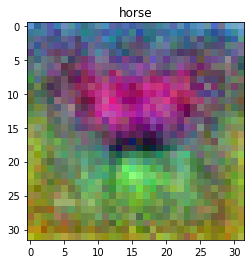

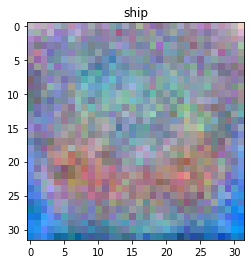

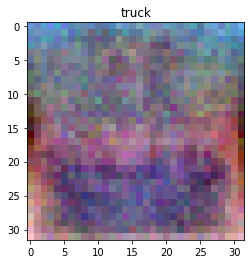

In [7]:
# SGD
plot_weight(linear_sgd,label_names)

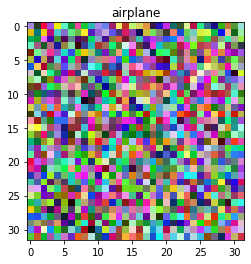

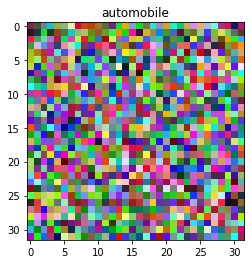

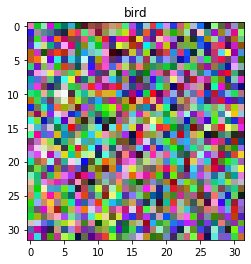

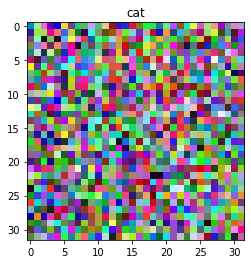

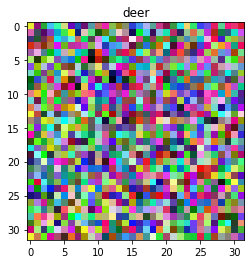

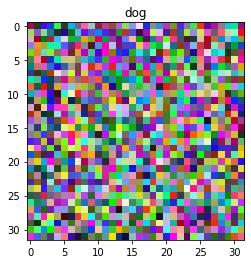

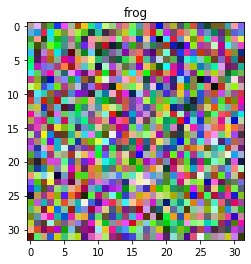

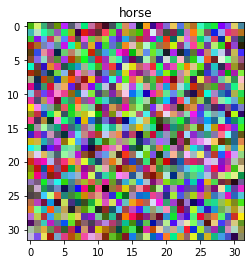

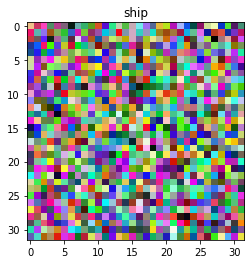

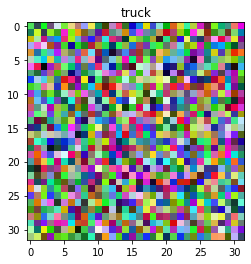

In [8]:
# Random Search
plot_weight(linear_rs,label_names)

# 각 class별 정확도 확인하기

In [35]:
def acc_per_class(model,images,labels):
    # images shape : [bn,bs,c,w,h]
    # labels shape : [bn,bs,1]

    accs=[]

    label_counts=np.zeros(10)
    acc_sum=np.zeros(10)
    for x_train,y_train in zip(images,labels):
        # x_train (bs,c*w*h)
        # y_train (bs)
        x_train = x_train.reshape(x_train.shape[0], -1)
        y_probs=model.predict(x_train)
        y_preds=np.argmax(y_probs,axis=1).reshape(-1,1)
        for i in range(10):
            y_i=y_train[np.where(y_train==i)]
            y_p=y_preds[np.where(y_train==i)]
            label_counts[i]+=len(y_i)
            acc=(y_i==y_p).sum()
            acc_sum[i]+=acc

    acc_mean=acc_sum/label_counts
    accs=acc_mean.tolist()
    return accs

### SGD

In [37]:
sgd_accs=acc_per_class(linear_sgd,train_images,train_labels)
sgd_test=acc_per_class(linear_sgd,test_images,test_labels)

In [38]:
sgd_accs,sgd_test

([0.49488875526157544,
  0.5343373493975904,
  0.1839518555667001,
  0.37206030150753766,
  0.20365168539325842,
  0.36960449708893794,
  0.420249096022499,
  0.468555354631304,
  0.5045244319324351,
  0.46102852551225393],
 [0.493, 0.523, 0.178, 0.37, 0.189, 0.36, 0.428, 0.459, 0.481, 0.423])

### Random Search

In [40]:
rs_accs=acc_per_class(linear_rs,train_images,train_labels)
rs_test=acc_per_class(linear_rs,test_images,test_labels)

In [41]:
rs_accs,rs_test

([0.006814992984566046,
  0.0,
  0.00020060180541624874,
  0.0,
  0.001203852327447833,
  0.02931138325637422,
  0.15247087183607874,
  0.0004018485031143259,
  0.9461089885381058,
  0.0],
 [0.006, 0.0, 0.001, 0.0, 0.0, 0.036, 0.162, 0.0, 0.928, 0.0])